In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# EDA

In [2]:
data=pd.read_csv("crime_data.csv")
data.head(5)

,Disposition,OffenderStatus,Offender_Race,Offender_Gender,Offender_Age,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Report Type,Category
0,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
1,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
2,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
3,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
4,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft


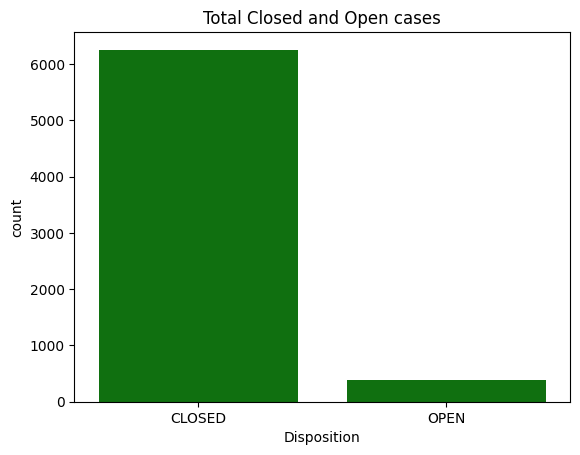

In [3]:
sns.countplot(x="Disposition",data=data,color="green")
plt.title("Total Closed and Open cases")
plt.show()

# Feature Engineering

In [4]:
data["Disposition"]=data["Disposition"].replace({"CLOSED":0,"OPEN":1})
data["OffenderStatus"]=data["OffenderStatus"].replace({"ARRESTED":1})

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_86803/1835684162.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Disposition"]=data["Disposition"].replace({"CLOSED":0,"OPEN":1})
/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_86803/1835684162.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["OffenderStatus"]=data["OffenderStatus"].replace({"ARRESTED":1})


In [5]:
le=LabelEncoder()
data["Offender_Race"]=le.fit_transform(data["Offender_Race"])
data["Offender_Gender"]=le.fit_transform(data["Offender_Gender"])
data["PersonType"]=le.fit_transform(data["PersonType"])
data["Victim_Race"]=le.fit_transform(data["Victim_Race"])
data["Victim_Gender"]=le.fit_transform(data["Victim_Gender"])
data["Victim_Fatal_Status"]=le.fit_transform(data["Victim_Fatal_Status"])
data["Report Type"]=le.fit_transform(data["Report Type"])
data["Category"]=le.fit_transform(data["Category"])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638 entries, 0 to 6637
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Disposition          6638 non-null   int64  
 1   OffenderStatus       6638 non-null   int64  
 2   Offender_Race        6638 non-null   int64  
 3   Offender_Gender      6638 non-null   int64  
 4   Offender_Age         6638 non-null   float64
 5   PersonType           6638 non-null   int64  
 6   Victim_Race          6638 non-null   int64  
 7   Victim_Gender        6638 non-null   int64  
 8   Victim_Age           6638 non-null   float64
 9   Victim_Fatal_Status  6638 non-null   int64  
 10  Report Type          6638 non-null   int64  
 11  Category             6638 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 622.4 KB


<Axes: >

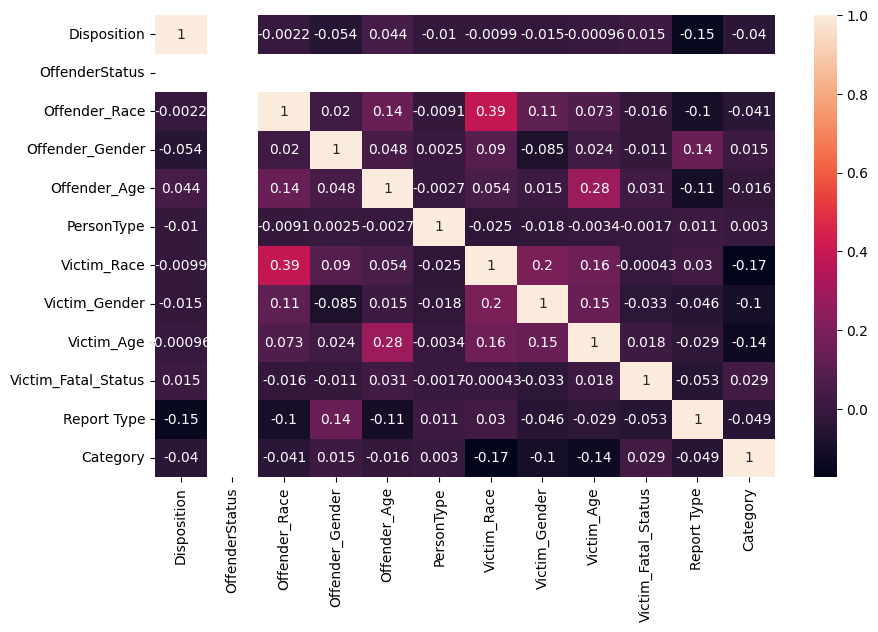

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [8]:
ss=StandardScaler()
x=data.drop(["Disposition"],axis=1)
y=data["Disposition"]
x=ss.fit_transform(x)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Classifier

In [12]:
classifier={
    "Logistic Regression":LogisticRegression(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier()
}

In [13]:
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")
    print(classification_report(y_test,y_pred))

Logistic Regression
94.3524096385542
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1253
           1       0.00      0.00      0.00        75

    accuracy                           0.94      1328
   macro avg       0.47      0.50      0.49      1328
weighted avg       0.89      0.94      0.92      1328



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Random Forest Classifier
95.03012048192771
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1253
           1       0.70      0.21      0.33        75

    accuracy                           0.95      1328
   macro avg       0.83      0.60      0.65      1328
weighted avg       0.94      0.95      0.94      1328

Decision Tree Classifier
92.7710843373494
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1253
           1       0.34      0.31      0.32        75

    accuracy                           0.93      1328
   macro avg       0.65      0.64      0.64      1328
weighted avg       0.92      0.93      0.93      1328

Ada Boost Classifier
94.3524096385542
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1253
           1       0.00      0.00      0.00        75

    accuracy                           0.94      1328
   ma

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/L

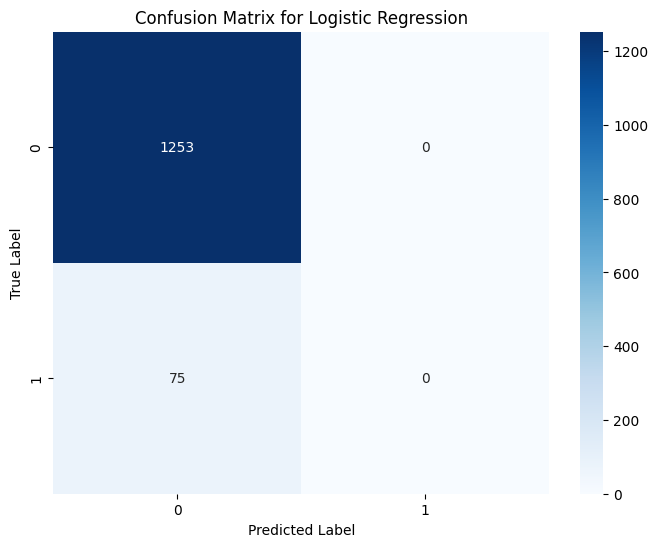

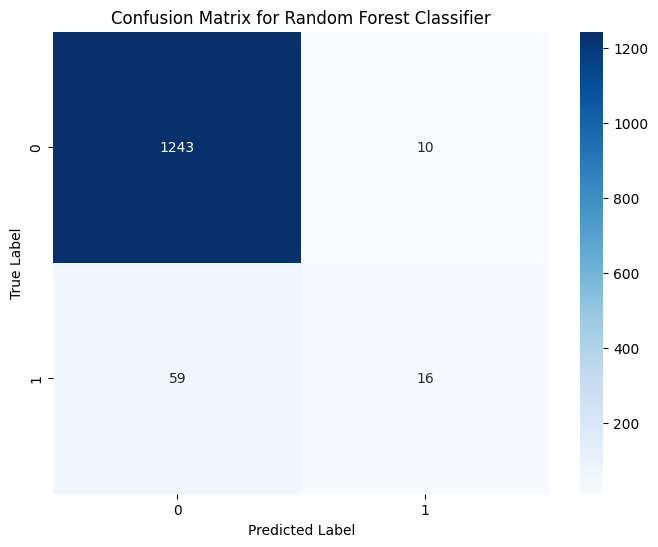

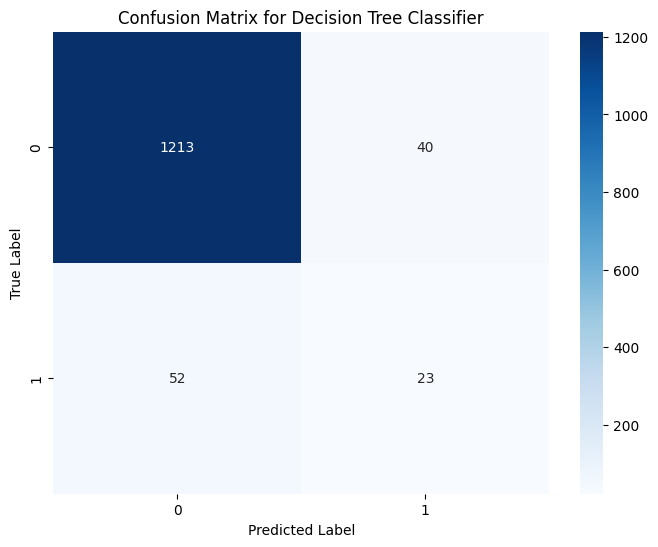

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


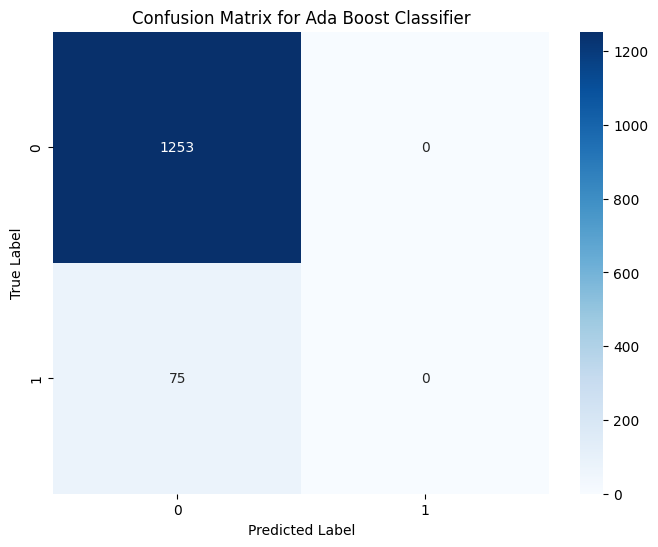

In [34]:
accuracy_results={}
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_results[name]=accuracy
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [14]:
result={
    "Model":["Logistic Regression","Random Forest Classifier","Decision Tree Classifier","Ada Boost Classifier"],
    "Accuracy":[94.35,95.03,92.77,94.35]
}

In [15]:
result_df=pd.DataFrame(result)

# Results

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_86803/236552040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model",y="Accuracy",data=result_df,palette="colorblind")


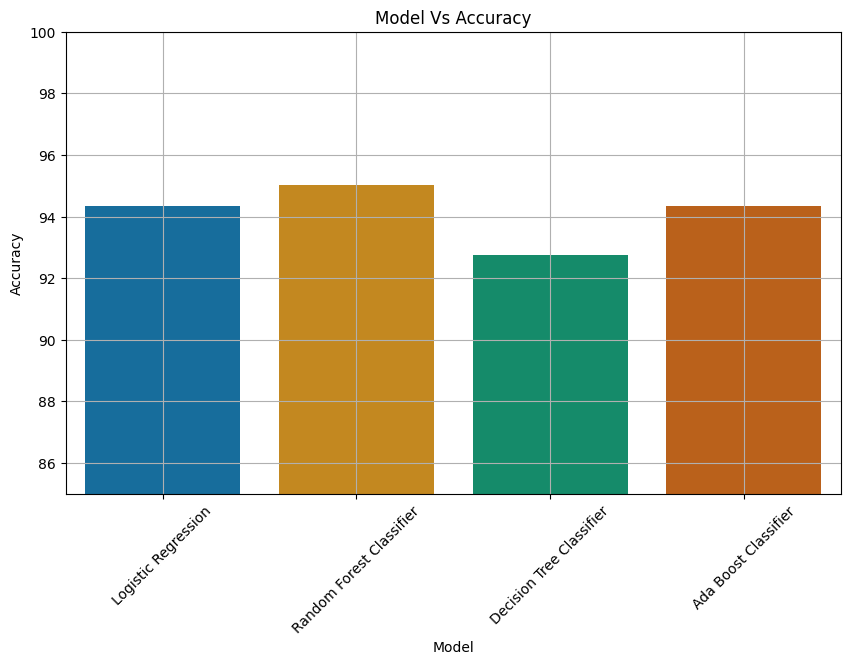

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model",y="Accuracy",data=result_df,palette="colorblind")
plt.ylim(85,100)
plt.title("Model Vs Accuracy")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()